# Initializing QTLab stuff

In [409]:
%run C:\qtlab_replacement\init.py
from instruments import *
import numpy as np
import sweep
import pandas as pd
from save_pkl import *
from IPython.display import clear_output

<Figure size 1152x576 with 0 Axes>

In [410]:
import os
os.chdir("C:\qtlab_replacement\instruments\_labbrick")

# Iniatializing Plotting and auxilary tools

In [411]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.ticker
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.cm as cm
import pickle
import re

# Создаем форматер
formatter = matplotlib.ticker.ScalarFormatter ()
formatter.set_powerlimits((-3, 1))
hfont = {'fontname':'Arial'}

from playsound import playsound

from ipywidgets import IntProgress
from IPython.display import display
import time

In [199]:
def unwrap_phase(datapha):
    for i in range(0, len(datapha)-1):
        if datapha[i+1]-datapha[i] >= numpy.pi:
            datapha[i+1] = datapha[i+1] - 2.*numpy.pi
        elif datapha[i+1]-datapha[i] <= -numpy.pi:
            datapha[i+1] = datapha[i+1] + 2.*numpy.pi
    return datapha
def total_unwrap(datapha):
    j = 0
    for i in range(0, len(datapha)-1):
        if datapha[i+1]-datapha[i] >= numpy.pi:
            j=j+1
        elif datapha[i+1]-datapha[i] <= -numpy.pi:
            j=j+1
    for i in range(0, j):
        unwrap_phase(datapha)
    return datapha

In [374]:
from resonator_tools import circuit

In [4]:
def zero_sound():
    playsound(r'C:\\qtlab_replacement\\voise\\zero.mp3')
def complete_sound():
    playsound(r'C:\\qtlab_replacement\\voise\\complete.mp3')    
def stable_sound():
    playsound(r'C:\\qtlab_replacement\\voise\\stable.mp3')  
def lockin_complete_sound():
    playsound(r'C:\\qtlab_replacement\\voise\\lockin_complete.mp3')
def magnetic_stable_sound():
    playsound(r'C:\\qtlab_replacement\\voise\\magnetic_stable.mp3')    

In [5]:
def status():
    magnet_state = int(magnet.get_rampingstate())
    if (magnet_state == 1):
        print('RAMPING to target field/current')
    if (magnet_state == 2):
        print('HOLDING at the target field/current')
    if (magnet_state == 3):
        print('PAUSED')
    if (magnet_state == 4):
        print('Ramping in MANUAL UP mode')
    if (magnet_state == 5):
        print('Ramping in MANUAL DOWN mode')
    if (magnet_state == 6):
        print('ZEROING CURRENT (in progress)')
    if (magnet_state == 7):
        print('Quench detected')
    if (magnet_state == 8):
        print('At ZERO current')
    if (magnet_state == 9):
        print('Heating persistent switch')
    if (magnet_state == 10):
        print('Cooling persistent switch')

In [6]:
def freq_to_field(frequency):
    return frequency/28
def field_to_freq(field):
    return field*28
def kelvin_to_GHz(kelvin):
    return 20.8334*kelvin
def GHz_to_kelvin(GHz):
    return 0.048*GHz

def get_mult_freq(frequency):
    return frequency/12
def get_der_freq(frequency):
    return frequency*12

In [7]:
import urllib, requests
from datetime import datetime as dt
import telegram

In [8]:
t_id = '5102635867:AAGGWxqI7URoP5uWOyNPf99ZuJIsLQKqW-o'
c_id = '42924842'

In [9]:
def telegram_notification(message):
    now = dt.now() # current date and time
    time = now.strftime("%d/%m/%Y, %H:%M:%S")
    l_msg = time +"\n" + message

    url = 'https://api.telegram.org/bot%s/sendMessage?chat_id=%s&text=%s' % (
        t_id, c_id, urllib.parse.quote_plus(l_msg))
    _ = requests.get(url, timeout=10)

In [10]:
telegram_notification('Magnetic field is Zero')

In [16]:
bot = telegram.Bot(token=t_id)
bot.send_message(chat_id=c_id, text="Experimental data from Telegram Bot")
bot.send_photo(chat_id=c_id, photo=open(PHOTO_PATH, 'rb'))

FileNotFoundError: [Errno 2] No such file or directory: 'img/Test.png'

In [17]:
def telegram_photo_notification(message, path, token_id, chat_id):
    bot = telegram.Bot(token=token_id)
    bot.send_message(chat_id=chat_id, text=message)
    bot.send_photo(chat_id=chat_id, photo=open(path, 'rb'))

In [18]:
PHOTO_PATH = 'img/Test.png'
telegram_photo_notification("Test message", PHOTO_PATH, t_id, c_id)

FileNotFoundError: [Errno 2] No such file or directory: 'img/Test.png'

# Keysight E5071CA Vector network Analyzer

In [423]:
vna = Keysight_E5071C('vna', address = 'VNA')

In [424]:
vna.set_sweep_mode("LIN")

True

In [731]:
vna.set_xlim(5.75e9,6.25e9)
vna.set_nop(2001)
vna.set_average(1)
vna.set_averages(2)
vna.set_bandwidth(2000)
vna.set_power(-60)

True

In [733]:
x,y = vna.get_tracedata(format = 'AMPPHA')
#x,y = vna.get_tracedata(format = 'REALIMAG')

In [723]:
vna.get_sweep_time()

981.24044

In [724]:
freqs = vna.get_freqpoints()/1e9

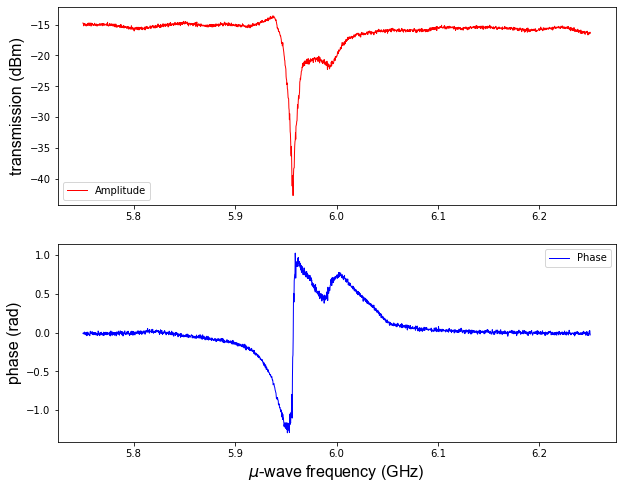

In [725]:
fig, axes = plt.subplots(2,1,figsize=(10, 8))

p = axes[0].plot(freqs, 10*np.log(x), linewidth=1.0, c = 'r', label='Amplitude')
p = axes[1].plot(freqs, total_unwrap(y)-total_unwrap(y1), linewidth=1.0, c = 'b', label='Phase')

#axes.axis('tight')
axes[1].set_xlabel(r'$\mu$-wave frequency (GHz)', fontsize=16, **hfont)

axes[0].set_ylabel(r'transmission (dBm)', fontsize=16, **hfont)
axes[1].set_ylabel(r'phase (rad)', fontsize=16, **hfont)

axes[0].legend()
axes[1].legend()

In [734]:
lo1.set_status(False)
lo1.set_power(8)
lo1.set_frequency(11.9e9)
lo1.set_status(True)

True

In [736]:
x_pump,y_pump = vna.get_tracedata(format = 'AMPPHA')

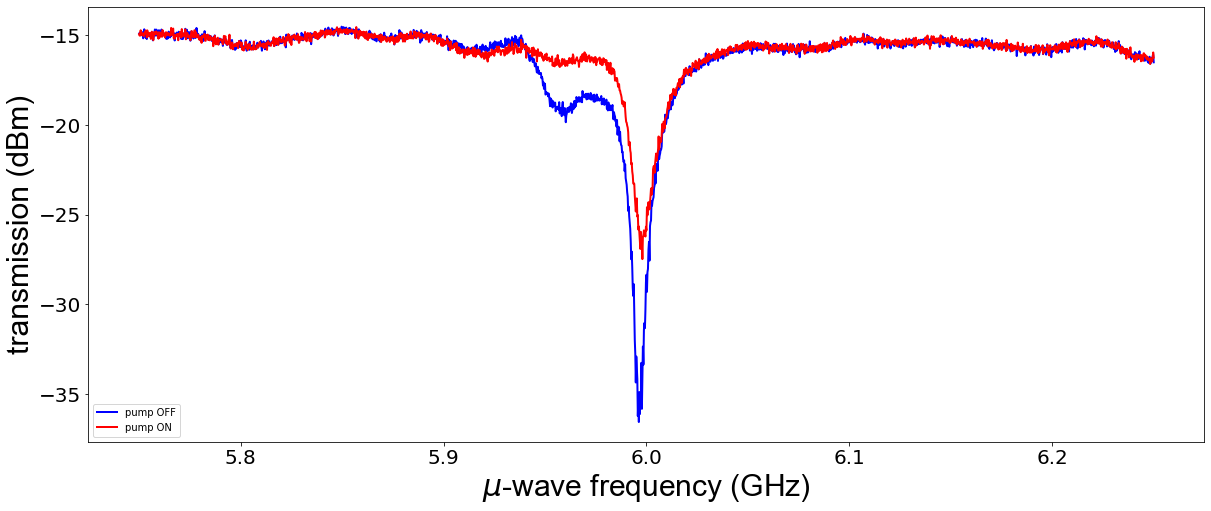

In [737]:
fig, axes = plt.subplots(1,1,figsize=(20, 8))

p = axes.plot(freqs, 10*np.log(x), linewidth=2.0, c = 'b', label='pump OFF')
p = axes.plot(freqs, 10*np.log(x_pump), linewidth=2.0, c = 'r', label='pump ON')

#axes.axis('tight')
axes.set_xlabel(r'$\mu$-wave frequency (GHz)', fontsize=30, **hfont)
axes.tick_params(axis='x', labelsize=20)
axes.tick_params(axis='y', labelsize=20)

axes.set_ylabel(r'transmission (dBm)', fontsize=30, **hfont)
axes.legend()

In [738]:
lo1.set_status(False)

True

save the trace data

In [739]:
name = "experimental data/vna JPA, frequency sweep 5.75-6.25 GHz at -60dBm_pump ON"+datetime.datetime.now().strftime("%Y%m%d%H%M%S.txt")
file = open(name,"w")
for freq_id, freq_value in enumerate(freqs):
    file.write(f"{freq_value*1e9}\t")
    file.write(f"{10*np.log(x)[freq_id]}\t")
    file.write(f"{(total_unwrap(y)-total_unwrap(y1))[freq_id]/2/np.pi*360}\n")
file.close()

In [582]:
vna.set_power(-35)

True

In [584]:
x1,y1 = vna.get_tracedata(format = 'AMPPHA')

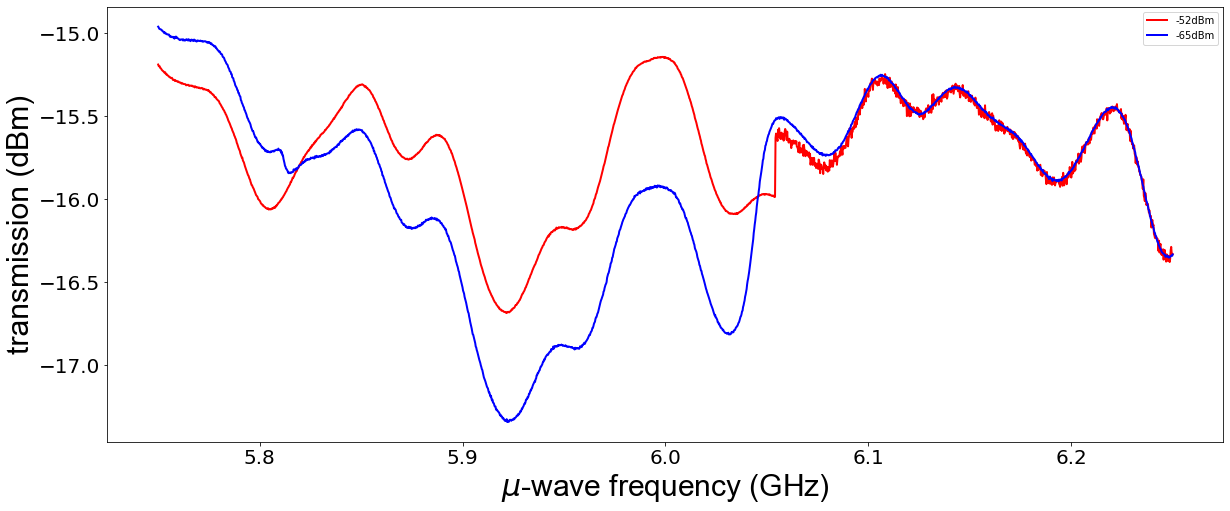

In [585]:
fig, axes = plt.subplots(1,1,figsize=(20, 8))

p = axes.plot(freqs, 10*np.log(x), linewidth=2.0, c = 'r', label='-52dBm')
p = axes.plot(freqs, 10*np.log(x1), linewidth=2.0, c = 'b', label='-65dBm')

#axes.axis('tight')
axes.set_xlabel(r'$\mu$-wave frequency (GHz)', fontsize=30, **hfont)
axes.tick_params(axis='x', labelsize=20)
axes.tick_params(axis='y', labelsize=20)

axes.set_ylabel(r'transmission (dBm)', fontsize=30, **hfont)
axes.legend()


# fitting the Q-factor from the trace data

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


,Qi,Qc,Ql,fr,theta0,Ql_err,Qc_err,fr_err,chi_square,Qi_err
0,3.69e+02,3.73e+02,1.85e+02,6.00e+09,-2.07e-01,4.90e+00,7.14e+00,3.00e+05,1.61e-02,1.52e+01


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


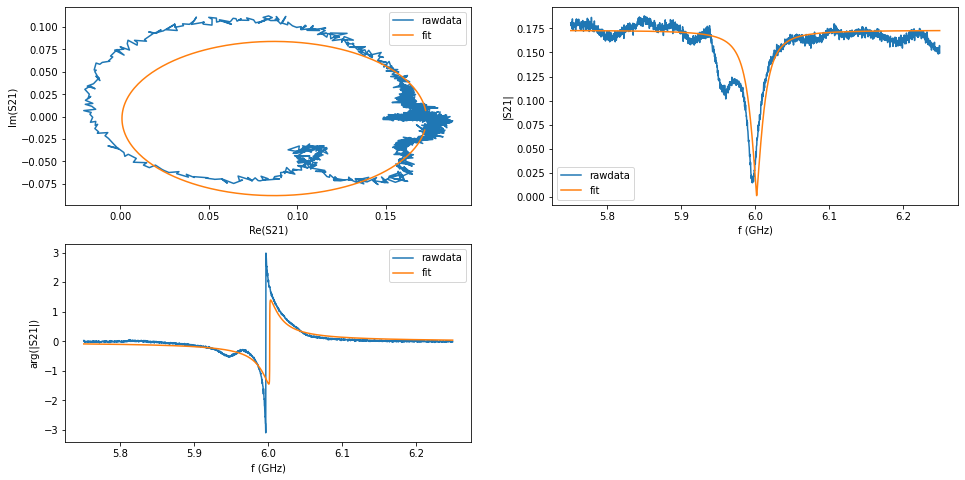

single photon limit: -123.9089598834376 dBm
done


In [740]:
#port1 = circuit.notch_port()
port1 = circuit.reflection_port()
#port1.add_fromtxt('experimental data/vna JPA, frequency sweep 5.75-6.25 GHz at -60dBm20220712132840.txt','dBmagphasedeg',1)
#port1.add_fromtxt('experimental data/vna JPA, frequency sweep 5.75-6.25 GHz at -52dBm20220712150627.txt','dBmagphasedeg',1)
port1.add_fromtxt('experimental data/vna JPA, frequency sweep 5.75-6.25 GHz at -60dBm_pump ON20220712183935.txt','dBmagphasedeg',1)
port1.autofit()
#print("Fit results:", port1.fitresults)
display(pd.DataFrame([port1.fitresults]).applymap(lambda x: "{0:.2e}".format(x)))
port1.autofit(electric_delay=0.)
plt.rcParams["figure.figsize"] = [16,8]
port1.plotall()
print("single photon limit:", port1.get_single_photon_limit(), "dBm")
print("done")

# Plotting VNA data vs power

In [586]:
vna.set_xlim(5.75e9,6.25e9)
vna.set_nop(2001)
vna.set_average(1)
vna.set_averages(2)
vna.set_bandwidth(100)
vna.set_power(-52)
sleep_time = vna.get_sweep_time()/1000

In [587]:
x,y = vna.get_tracedata(format = 'AMPPHA')

In [395]:
freq_steps = vna.get_nop()
freq=np.linspace(vna.get_startfreq()/1e9,vna.get_stopfreq()/1e9, freq_steps)       

power_steps = 30
power = np.linspace(vna.get_power(), -40, power_steps)

In [396]:
Transmission = np.zeros((power_steps,freq_steps), dtype=float)
Phase = np.zeros((power_steps,freq_steps), dtype=float)

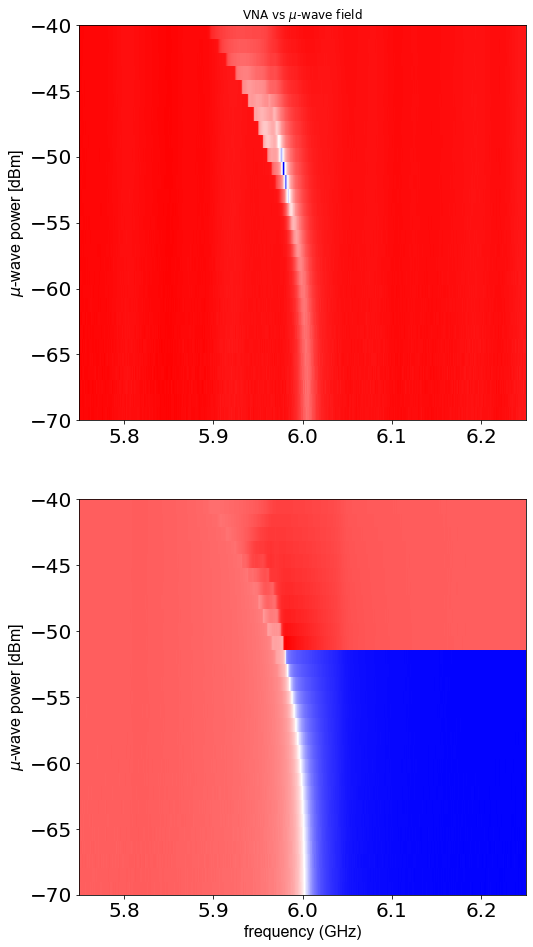

Power:  -70.0 [dBm]


<ipython-input-401-dcb3e1e037d4>:43: RuntimeWarning: divide by zero encountered in log
  p = axes[0].pcolor(freq, power, 10*np.log(Transmission), cmap=cm.bwr)
<ipython-input-401-dcb3e1e037d4>:43: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p = axes[0].pcolor(freq, power, 10*np.log(Transmission), cmap=cm.bwr)
<ipython-input-401-dcb3e1e037d4>:48: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p = axes[1].pcolor(freq, power, Phase, cmap=cm.bwr)


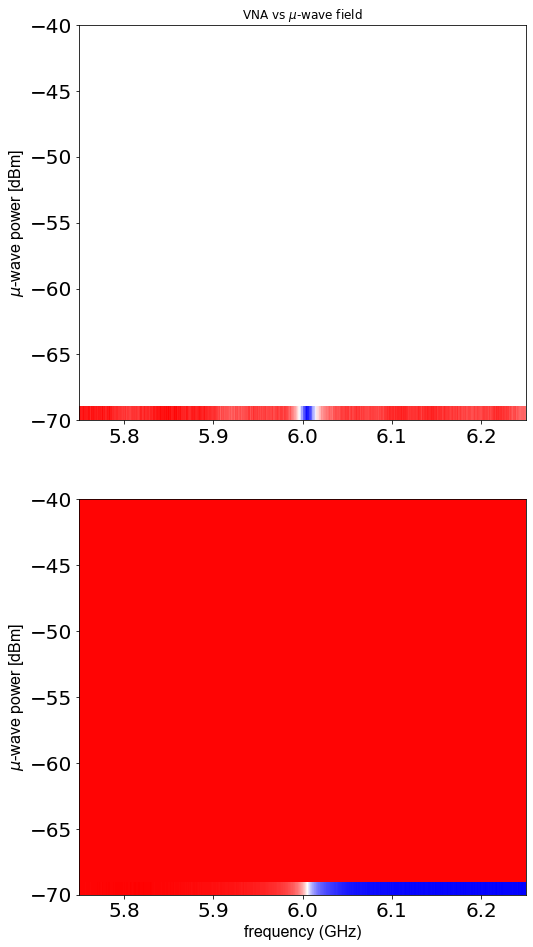

Power:  -68.966 [dBm]
Power:  -67.931 [dBm]
Power:  -66.897 [dBm]
Power:  -65.862 [dBm]
Power:  -64.828 [dBm]
Power:  -63.793 [dBm]
Power:  -62.759 [dBm]
Power:  -61.724 [dBm]
Power:  -60.69 [dBm]
Power:  -59.655 [dBm]
Power:  -58.621 [dBm]
Power:  -57.586 [dBm]
Power:  -56.552 [dBm]
Power:  -55.517 [dBm]
Power:  -54.483 [dBm]
Power:  -53.448 [dBm]
Power:  -52.414 [dBm]
Power:  -51.379 [dBm]
Power:  -50.345 [dBm]
Power:  -49.31 [dBm]
Power:  -48.276 [dBm]
Power:  -47.241 [dBm]
Power:  -46.207 [dBm]
Power:  -45.172 [dBm]
Power:  -44.138 [dBm]
Power:  -43.103 [dBm]
Power:  -42.069 [dBm]
Power:  -41.034 [dBm]
Power:  -40.0 [dBm]


In [401]:
name = "experimental data/vna JPA 3Dscan,power sweep from -70dBm to -40dBm"+datetime.datetime.now().strftime("%Y%m%d%H%M%S.txt")
file = open(name,"w")

fig, axes = plt.subplots(2,1,figsize=(8, 16))
hfig = display(fig, display_id=True)

for power_id, power_value in enumerate(power):
    print('Power: ', round(power_value,3), '[dBm]')
    
    vna.set_power(power_value)
    sleep(0.3)
    
    x,y = vna.get_tracedata(format = 'AMPPHA')
    sleep(sleep_time)
    sleep(0.2)
    
    
    #file.write(f"{power_value}\n")
    #for row in x:
    #    file.write(row)
    #for row in y:
    #    file.write(row)
    
    file.write(f"{power_value}\n")
    file.write(f"{x}\n")
    file.write(f"{y}\n")
    
    Transmission[power_id] = x 
    Phase[power_id] = total_unwrap(y)-total_unwrap(y1) 

    # dynamic plot
    axes[0].cla()
    axes[1].cla()
    axes[0].set_title('VNA vs $\mu$-wave field')
    axes[0].tick_params(axis='x', labelsize=20)
    axes[0].tick_params(axis='y', labelsize=20)
    axes[1].tick_params(axis='x', labelsize=20)
    axes[1].tick_params(axis='y', labelsize=20)
    axes[0].set_ylabel('$\mu$-wave power [dBm]', fontsize=16, **hfont)
    axes[1].set_xlabel('frequency (GHz)', fontsize=16, **hfont)
    axes[1].set_ylabel('$\mu$-wave power [dBm]', fontsize=16, **hfont)
    
    p = axes[0].pcolor(freq, power, 10*np.log(Transmission), cmap=cm.bwr)
    #cb = fig.colorbar(p, ax=axes[0])
    #cb.set_label(r'transmission (dBm)', labelpad=20, rotation=270, fontsize=24, **hfont)
    #cb.ax.tick_params(labelsize=18)
    
    p = axes[1].pcolor(freq, power, Phase, cmap=cm.bwr)
    #cb = fig.colorbar(p, ax=axes[1])
    #cb.set_label(r'phase (rad)', labelpad=20, rotation=270, fontsize=24, **hfont)
    #cb.ax.tick_params(labelsize=18)
    
    hfig.update(fig)
    plt.pause(0.1)
    
file.close()
complete_sound()
telegram_notification('The measurement is complite')

In [402]:
file.close()

# substract the background

In [619]:
Transmission_nobg = np.zeros((power_steps,freq_steps), dtype=float)
for i_id,i_value in enumerate(Transmission_nobg):
    Transmission_nobg[i_id]=10*np.log(Transmission[i_id])-10*np.log(Transmission[0])

<ipython-input-620-1c9123f86e2b>:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p = axes.pcolor(freq, power, Transmission_nobg, cmap=cm.bwr)


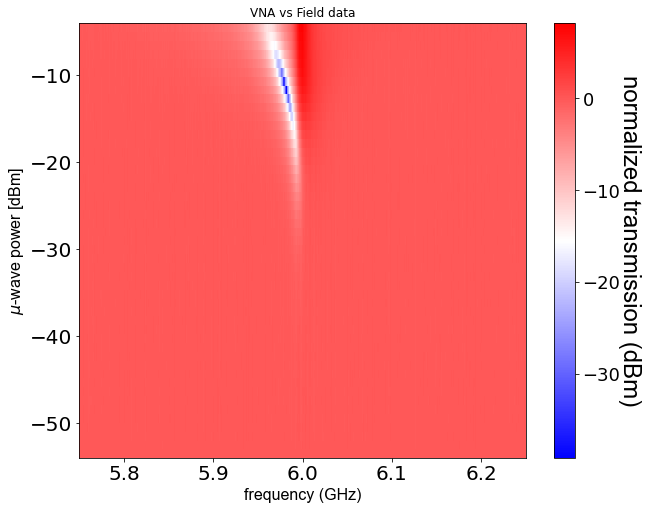

In [620]:
fig, axes = plt.subplots(1,1,figsize=(10, 8))

axes.set_title('VNA vs Field data')
axes.tick_params(axis='x', labelsize=20)
axes.tick_params(axis='y', labelsize=20)

axes.set_ylabel('$\mu$-wave power [dBm]', fontsize=16, **hfont)
axes.set_xlabel('frequency (GHz)', fontsize=16, **hfont)

p = axes.pcolor(freq, power, Transmission_nobg, cmap=cm.bwr)

cb = fig.colorbar(p, ax=axes)
cb.set_label(r'normalized transmission (dBm)', labelpad=20, rotation=270, fontsize=24, **hfont)
cb.ax.tick_params(labelsize=18)

# Lab brick test

In [413]:
get_labbricks()

{1: {'name': 'LMS-183DX', 'serial_number': 27937}}

In [414]:
lo1 = Labbrick(name='LMS-183DX', serial=27937)

In [525]:
lo1.set_power(-55)
lo1.get_power()

-54.0

In [420]:
lo1.set_status(False)
lo1.set_power(-50)
lo1.set_frequency(6.000e9)

True

In [532]:
lo1.get_frequency()

12000000000.0

In [535]:
lo1.set_status(False)

True

# VNA data vs pump power

In [690]:
vna.set_xlim(5.75e9,6.25e9)
vna.set_nop(2001)
vna.set_average(1)
vna.set_averages(2)
vna.set_bandwidth(200)
vna.set_power(-60)
sleep_time = vna.get_sweep_time()/1000

In [691]:
lo1.set_status(False)
lo1.set_power(-54)
lo1.set_frequency(11.900e9)

True

In [692]:
x,y = vna.get_tracedata(format = 'AMPPHA')

In [693]:
freq_steps = vna.get_nop()
freq=np.linspace(vna.get_startfreq()/1e9,vna.get_stopfreq()/1e9, freq_steps)       

power_steps = 10
power = np.linspace(0, 10, power_steps)

In [694]:
Transmission = np.zeros((power_steps,freq_steps), dtype=float)
Phase = np.zeros((power_steps,freq_steps), dtype=float)

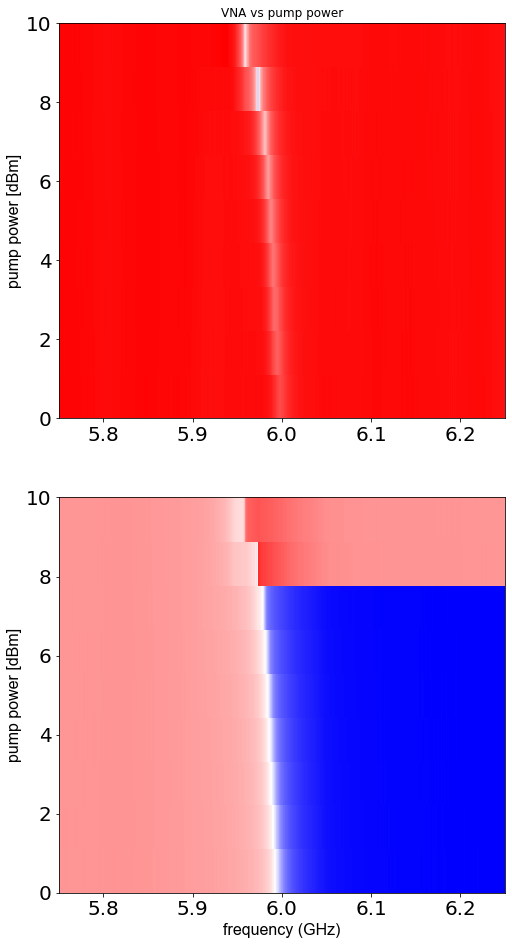

Power:  0.0 [dBm]


<ipython-input-695-60ac48ad6da0>:38: RuntimeWarning: divide by zero encountered in log
  p = axes[0].pcolor(freq, power, 10*np.log(Transmission), cmap=cm.bwr)
<ipython-input-695-60ac48ad6da0>:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p = axes[0].pcolor(freq, power, 10*np.log(Transmission), cmap=cm.bwr)
<ipython-input-695-60ac48ad6da0>:43: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p = axes[1].pcolor(freq, power, Phase, cmap=cm.bwr)


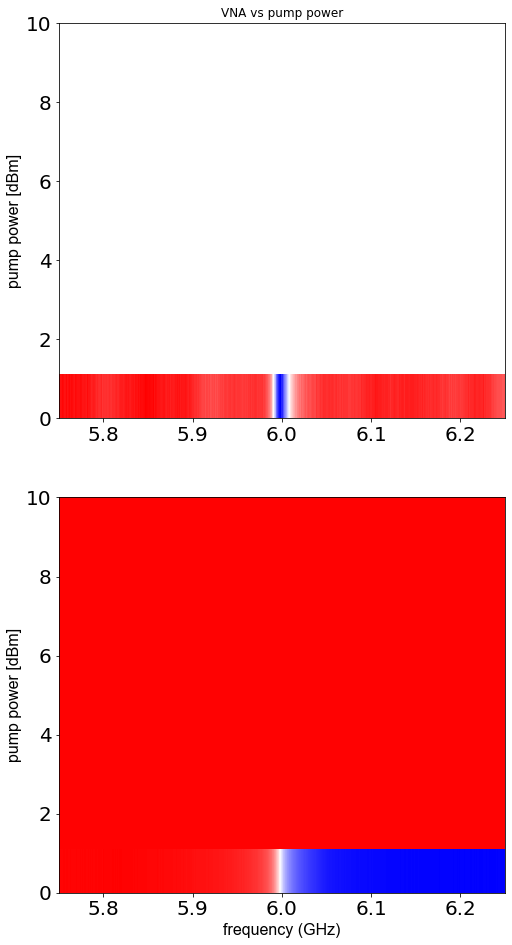

Power:  1.111 [dBm]
Power:  2.222 [dBm]
Power:  3.333 [dBm]
Power:  4.444 [dBm]
Power:  5.556 [dBm]
Power:  6.667 [dBm]
Power:  7.778 [dBm]
Power:  8.889 [dBm]
Power:  10.0 [dBm]


In [695]:
name = "experimental data/vna JPA 3Dscan,pump power sweep from 0dBm to 10dBm"+datetime.datetime.now().strftime("%Y%m%d%H%M%S.txt")
file = open(name,"w")

fig, axes = plt.subplots(2,1,figsize=(8, 16))
hfig = display(fig, display_id=True)

lo1.set_status(True)

for power_id, power_value in enumerate(power):
    print('Power: ', round(power_value,3), '[dBm]')
    
    lo1.set_power(power_value)
    sleep(0.3)
    
    x,y = vna.get_tracedata(format = 'AMPPHA')
    sleep(sleep_time)
    sleep(0.2)
    
    file.write(f"{power_value}\n")
    file.write(f"{list(x)}\n")
    file.write(f"{list(y)}\n")
    
    Transmission[power_id] = x 
    Phase[power_id] = total_unwrap(y)-total_unwrap(y1) 

    # dynamic plot
    axes[0].cla()
    axes[1].cla()
    axes[0].set_title('VNA vs pump power')
    axes[0].tick_params(axis='x', labelsize=20)
    axes[0].tick_params(axis='y', labelsize=20)
    axes[1].tick_params(axis='x', labelsize=20)
    axes[1].tick_params(axis='y', labelsize=20)
    axes[0].set_ylabel('pump power [dBm]', fontsize=16, **hfont)
    axes[1].set_xlabel('frequency (GHz)', fontsize=16, **hfont)
    axes[1].set_ylabel('pump power [dBm]', fontsize=16, **hfont)
    
    p = axes[0].pcolor(freq, power, 10*np.log(Transmission), cmap=cm.bwr)
    #cb = fig.colorbar(p, ax=axes[0])
    #cb.set_label(r'transmission (dBm)', labelpad=20, rotation=270, fontsize=24, **hfont)
    #cb.ax.tick_params(labelsize=18)
    
    p = axes[1].pcolor(freq, power, Phase, cmap=cm.bwr)
    #cb = fig.colorbar(p, ax=axes[1])
    #cb.set_label(r'phase (rad)', labelpad=20, rotation=270, fontsize=24, **hfont)
    #cb.ax.tick_params(labelsize=18)
    
    hfig.update(fig)
    plt.pause(0.1)
    
lo1.set_status(False)
file.close()
telegram_notification('The measurement is complite')

<ipython-input-696-550ce64c80c5>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p = axes[0].pcolor(freq, power, 10*np.log(Transmission), cmap=cm.bwr)
<ipython-input-696-550ce64c80c5>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p = axes[1].pcolor(freq, power, Phase, cmap=cm.bwr)


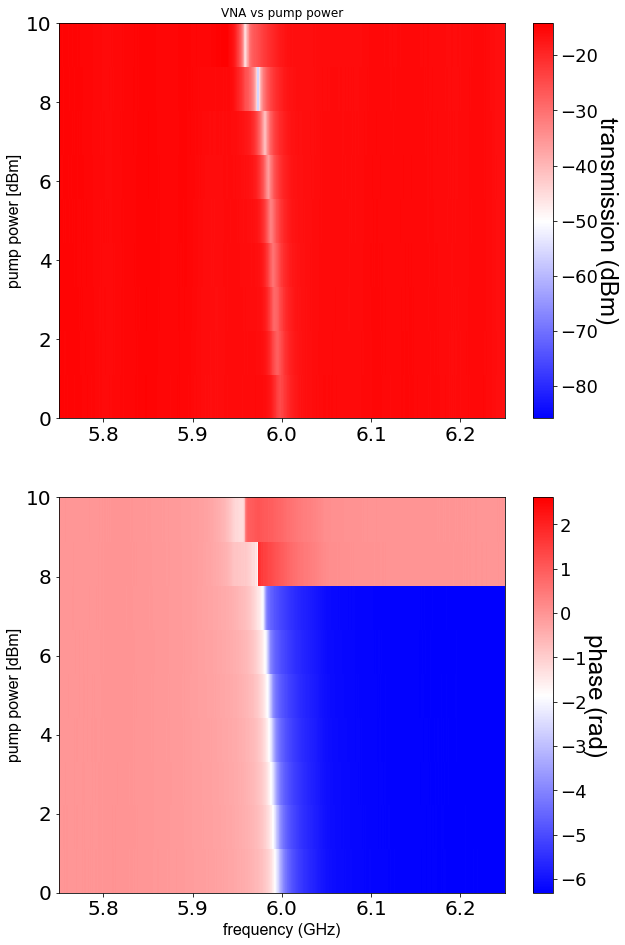

In [696]:
fig, axes = plt.subplots(2,1,figsize=(10, 16))


axes[0].set_title('VNA vs pump power')
axes[0].tick_params(axis='x', labelsize=20)
axes[0].tick_params(axis='y', labelsize=20)
axes[1].tick_params(axis='x', labelsize=20)
axes[1].tick_params(axis='y', labelsize=20)
axes[0].set_ylabel('pump power [dBm]', fontsize=16, **hfont)
axes[1].set_xlabel('frequency (GHz)', fontsize=16, **hfont)
axes[1].set_ylabel('pump power [dBm]', fontsize=16, **hfont)
    
p = axes[0].pcolor(freq, power, 10*np.log(Transmission), cmap=cm.bwr)
cb = fig.colorbar(p, ax=axes[0])
cb.set_label(r'transmission (dBm)', labelpad=20, rotation=270, fontsize=24, **hfont)
cb.ax.tick_params(labelsize=18)
    
p = axes[1].pcolor(freq, power, Phase, cmap=cm.bwr)
cb = fig.colorbar(p, ax=axes[1])
cb.set_label(r'phase (rad)', labelpad=20, rotation=270, fontsize=24, **hfont)
cb.ax.tick_params(labelsize=18)
    

plt.gcf().set_size_inches(10,16)
plt.savefig("experimental data/data.pdf", bbox_inches="tight")
PHOTO_PATH = 'experimental data/data.pdf'
telegram_photo_notification("Result of the measurement", PHOTO_PATH, t_id, c_id)
complete_sound()

# power and freq pump sweep

In [632]:
vna.set_xlim(6.0e9,6.0e9)
vna.set_nop(3)
vna.set_average(1)
vna.set_averages(2)
vna.set_bandwidth(100)
vna.set_power(-60)
sleep_time = vna.get_sweep_time()/1000

In [652]:
lo1.set_status(False)
lo1.set_power(-54)
lo1.set_frequency(12.000e9)

True

In [641]:
x,y = vna.get_tracedata(format = 'AMPPHA')

In [648]:
freq_steps = 400
freq=np.linspace(12.000e9-200e6,12.000e9+200e6, freq_steps)       

power_steps = 10
power = np.linspace(0, 10, power_steps)

In [649]:
Transmission = np.zeros((power_steps,freq_steps), dtype=float)
Phase = np.zeros((power_steps,freq_steps), dtype=float)

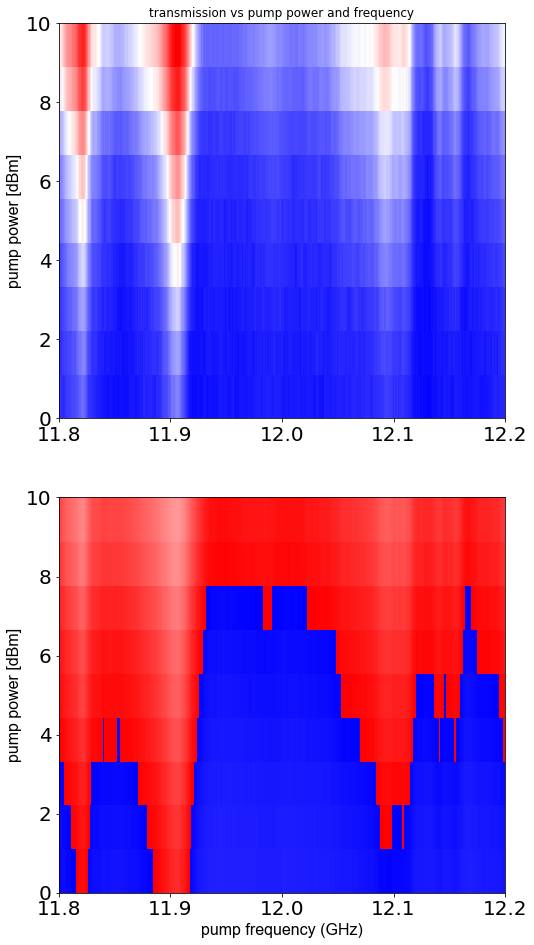

Power:  0.0 [dBm]


<ipython-input-650-3f46c295c1d1>:46: RuntimeWarning: divide by zero encountered in log
  p = axes[0].pcolor(freq/1e9, power, 10*np.log(Transmission), cmap=cm.bwr)
<ipython-input-650-3f46c295c1d1>:46: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p = axes[0].pcolor(freq/1e9, power, 10*np.log(Transmission), cmap=cm.bwr)
<ipython-input-650-3f46c295c1d1>:51: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p = axes[1].pcolor(freq/1e9, power, Phase, cmap=cm.bwr)


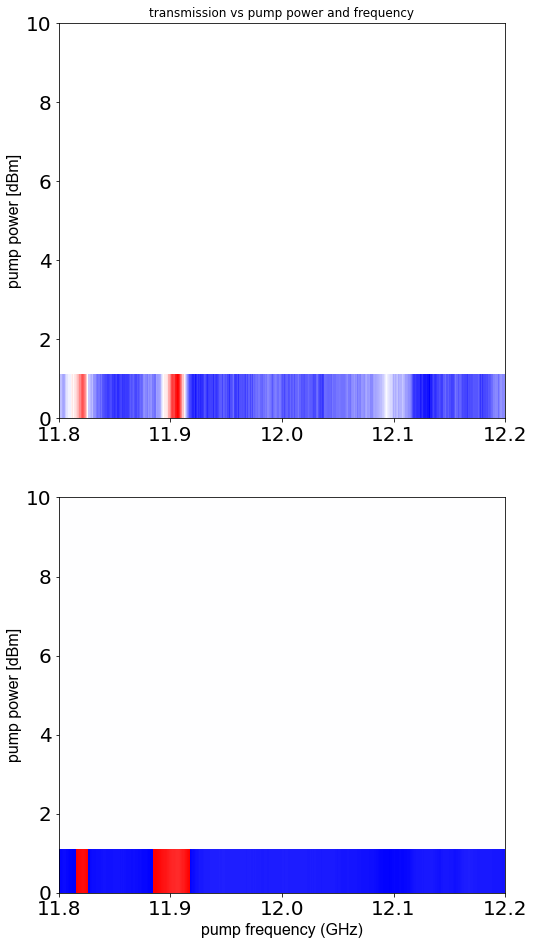

Power:  1.111 [dBm]
Power:  2.222 [dBm]
Power:  3.333 [dBm]
Power:  4.444 [dBm]
Power:  5.556 [dBm]
Power:  6.667 [dBm]
Power:  7.778 [dBm]
Power:  8.889 [dBm]
Power:  10.0 [dBm]


In [650]:
name = "experimental data/vna JPA 3Dscan,pump power sweep from 0dBm to 10dBm and +-200MHz"+datetime.datetime.now().strftime("%Y%m%d%H%M%S.txt")
file = open(name,"w")

fig, axes = plt.subplots(2,1,figsize=(8, 16))
hfig = display(fig, display_id=True)

lo1.set_status(True)

for power_id, power_value in enumerate(power):
    print('Power: ', round(power_value,3), '[dBm]')
    
    lo1.set_power(power_value)
    sleep(0.3)
    
    XX = []
    YY = []
    
    for freq_id, freq_value in enumerate(freq):
        lo1.set_frequency(freq_value)
        
        x,y = vna.get_tracedata(format = 'AMPPHA')
        sleep(sleep_time)
        sleep(0.1)
        XX.append(x[1])
        YY.append(y[1])
    
    file.write(f"{power_value}\n")
    file.write(f"{list(XX)}\n")
    file.write(f"{list(YY)}\n")
    
    Transmission[power_id] = XX 
    Phase[power_id] = YY

    # dynamic plot
    axes[0].cla()
    axes[1].cla()
    axes[0].set_title('transmission vs pump power and frequency')
    axes[0].tick_params(axis='x', labelsize=20)
    axes[0].tick_params(axis='y', labelsize=20)
    axes[1].tick_params(axis='x', labelsize=20)
    axes[1].tick_params(axis='y', labelsize=20)
    axes[0].set_ylabel('pump power [dBm]', fontsize=16, **hfont)
    axes[1].set_xlabel('pump frequency (GHz)', fontsize=16, **hfont)
    axes[1].set_ylabel('pump power [dBm]', fontsize=16, **hfont)
    
    p = axes[0].pcolor(freq/1e9, power, 10*np.log(Transmission), cmap=cm.bwr)
    #cb = fig.colorbar(p, ax=axes[0])
    #cb.set_label(r'transmission (dBm)', labelpad=20, rotation=270, fontsize=24, **hfont)
    #cb.ax.tick_params(labelsize=18)
    
    p = axes[1].pcolor(freq/1e9, power, Phase, cmap=cm.bwr)
    #cb = fig.colorbar(p, ax=axes[1])
    #cb.set_label(r'phase (rad)', labelpad=20, rotation=270, fontsize=24, **hfont)
    #cb.ax.tick_params(labelsize=18)
    
    hfig.update(fig)
    plt.pause(0.1)
    
lo1.set_status(False)
file.close()
telegram_notification('The measurement is complite')

<ipython-input-651-8dbad222face>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p = axes[0].pcolor(freq/1e9, power, 10*np.log(Transmission), cmap=cm.bwr)
<ipython-input-651-8dbad222face>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p = axes[1].pcolor(freq/1e9, power, Phase, cmap=cm.bwr)


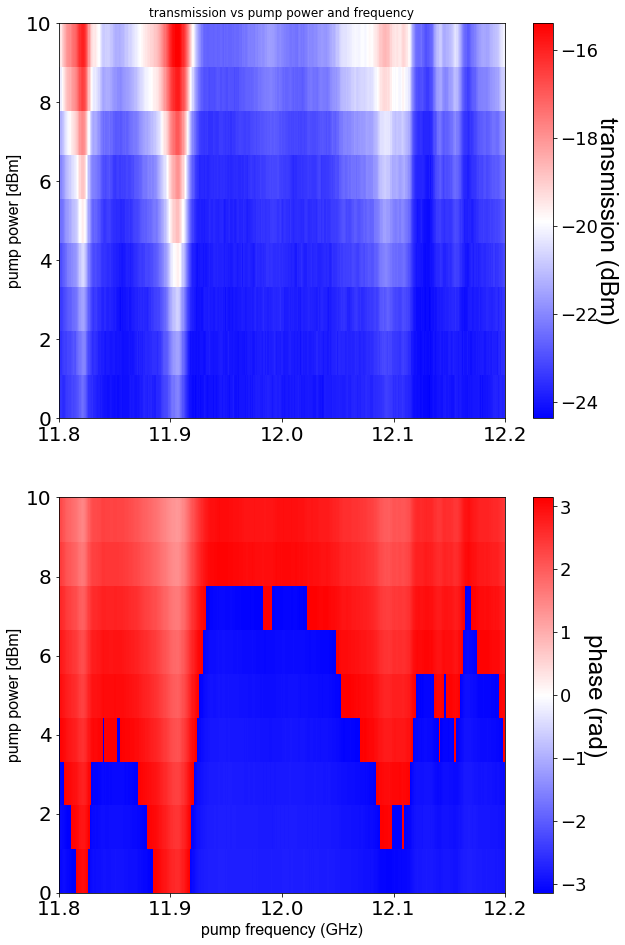

In [651]:
fig, axes = plt.subplots(2,1,figsize=(10, 16))

axes[0].set_title('transmission vs pump power and frequency')
axes[0].tick_params(axis='x', labelsize=20)
axes[0].tick_params(axis='y', labelsize=20)
axes[1].tick_params(axis='x', labelsize=20)
axes[1].tick_params(axis='y', labelsize=20)
axes[0].set_ylabel('pump power [dBm]', fontsize=16, **hfont)
axes[1].set_xlabel('pump frequency (GHz)', fontsize=16, **hfont)
axes[1].set_ylabel('pump power [dBm]', fontsize=16, **hfont)
    
p = axes[0].pcolor(freq/1e9, power, 10*np.log(Transmission), cmap=cm.bwr)
cb = fig.colorbar(p, ax=axes[0])
cb.set_label(r'transmission (dBm)', labelpad=20, rotation=270, fontsize=24, **hfont)
cb.ax.tick_params(labelsize=18)
    
p = axes[1].pcolor(freq/1e9, power, Phase, cmap=cm.bwr)
cb = fig.colorbar(p, ax=axes[1])
cb.set_label(r'phase (rad)', labelpad=20, rotation=270, fontsize=24, **hfont)
cb.ax.tick_params(labelsize=18)
    

plt.gcf().set_size_inches(10,16)
plt.savefig("experimental data/data.pdf", bbox_inches="tight")
PHOTO_PATH = 'experimental data/data.pdf'
telegram_photo_notification("Result of the measurement", PHOTO_PATH, t_id, c_id)
complete_sound()